In [6]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [7]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

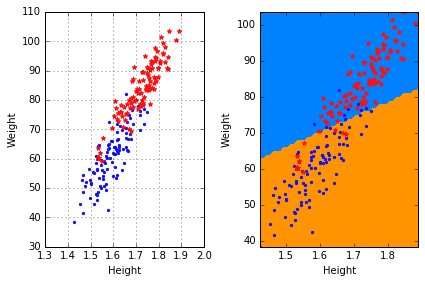

In [8]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y, tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

In [37]:
def simplify_sigmoid(x):
    if x > 7:
        return 1
    elif x > -7:
        return  1.0 / (1.0 + np.exp(-x))
    return 0.0

def simplify_log(x):
    if x > 7:
        return x
    elif x < -7:
        return 0
    return np.log(1.0+np.exp(x))
    
    

Compute your cost by negative log likelihood.

In [43]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return np.vectorize(simplify_sigmoid)(t)

In [48]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    txDot = tx.dot(w)
    txLog = np.vectorize(simplify_log)(txDot)
    return np.sum(txLog - y * txDot)

In [49]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T.dot(sigmoid(tx.dot(w)) -y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [50]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    w = w - gamma * grad
    return loss, w

Demo!

Current iteration=0, the loss=138.62943611198904
Current iteration=1000, the loss=43.49051218192899
Current iteration=2000, the loss=41.54977768402895
Current iteration=3000, the loss=41.09367055999421
Current iteration=4000, the loss=40.958306456387646
Current iteration=5000, the loss=40.911919013593206
Current iteration=6000, the loss=40.89602620554972
Current iteration=7000, the loss=40.889268954601945
Current iteration=8000, the loss=40.887075110376045
Current iteration=9000, the loss=40.88623733563053
The loss=40.885915192326145


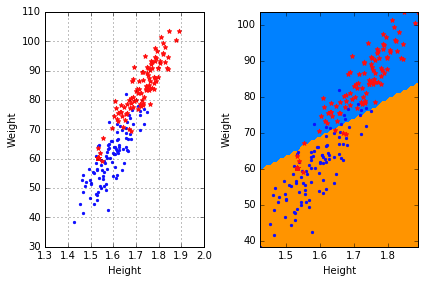

In [51]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.001
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [72]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    N = y.shape[0]
    # Calculate S
    txDot = sigmoid(tx.dot(w))
    result = np.zeros((N, N))
    
    for i in range(N):
        result[i][i] = txDot[i] * (1 - txDot[i])
    
    return tx.T.dot(result).dot(tx)

Write a function below to return loss, gradient, and hessian.

In [73]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    return calculate_loss(y, tx, w), calculate_gradient(y, tx, w), calculate_hessian(y, tx, w)

### Using Newton method
Use Newton method for logistic regression.

In [74]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, grad, hess = logistic_regression(y, tx, w)
    
    w = w - gamma * (np.linalg.inv(hess).dot(grad))
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=500, the loss=40.95433854234237
Current iteration=1000, the loss=40.88571517240957
The loss=40.885712566188914


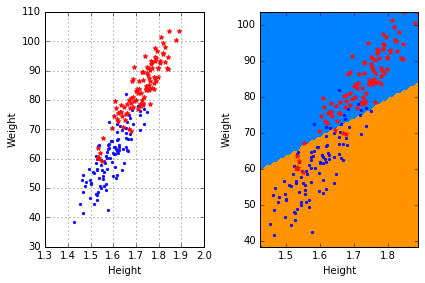

In [75]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [94]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    loss, grad, hess = logistic_regression(y, tx, w)
    spenalty = lambda_ * np.sum(np.square(w))
    penalty = 2 * lambda_ * np.sum(np.abs(w))
    return loss + spenalty, grad + penalty, hess

In [104]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    
    loss, grad, hess = penalized_logistic_regression(y, tx, w, lambda_)
   
    w = w - gamma * (np.linalg.pinv(hess).dot(grad))
    return loss, w

105.205754112
Current iteration=0, the loss=138.62943611198904
104.161544531
103.127838986
102.104528957
101.091507166
100.088667556
99.0959052756
98.1131166549
97.1401991919
96.177051533
95.2235734562
94.2796658547
93.3452307204
92.4201711286
91.5043912224
90.5977961978
89.700292289
88.8117867543
87.9321878621
87.0614048773
86.199348048
85.3459285925
84.5010586863
83.6646514499
82.8366209367
82.0168821206
81.2053508846
80.401944009
79.6065791603
78.8191748803
78.0396505748
77.2679265032
76.5039237677
75.7475643038
74.998770869
74.2574670339
73.5235771719
72.7970264496
72.0777408177
71.3656470011
70.6606724905
69.9627455328
69.2717951225
68.5877509931
67.9105436081
67.2401041532
66.5763645275
65.9192573353
65.2687158783
64.6246741477
63.9870668159
63.3558292292
62.7308974003
62.1122080003
61.4996983517
60.8933064211
60.292970812
59.6986307575
59.1102261137
58.5276973522
57.9509855542
57.3800324031
56.8147801779
56.2551717472
55.7011505623
55.1526606509
54.609646611
54.0720536047
53.539

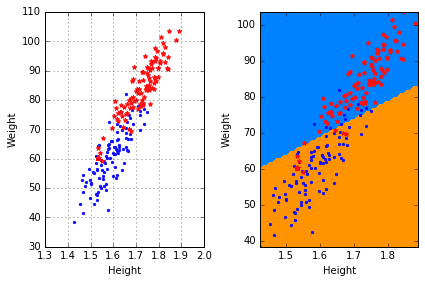

In [106]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)